### Prueba Piloto
**Ubicación**: Edificio uis salud, salon ---

**Objetivo:** realizar la medición de la tasa de recambio de aire apartir de la medición de  $CO_2$.

**Sensores:** durante esta prueba se usaron los sensores *Aranet4* y *ERIS_S8_2*.

*NOTA:* Se utilizaron 3 kilos de hielo seco, para generar el $CO_2$. (COP 30.000)

### Calibración
Antes de realizar el cálculo de la tasa de recambio de air, ACH, es necesario hacer una calibración entre los sensores. EL sensor de referencia es el *Aranet4*

In [1]:
import Air_flow.calib as cal
import Air_flow.ach as ach
import matplotlib.pyplot as plt

In [2]:
paramt, data = cal._import(['../Datos/aranet.csv','../Datos/ERIS_S8_2.csv'],'2021-03-04 09:00:00','2021-03-04 12:52:00')

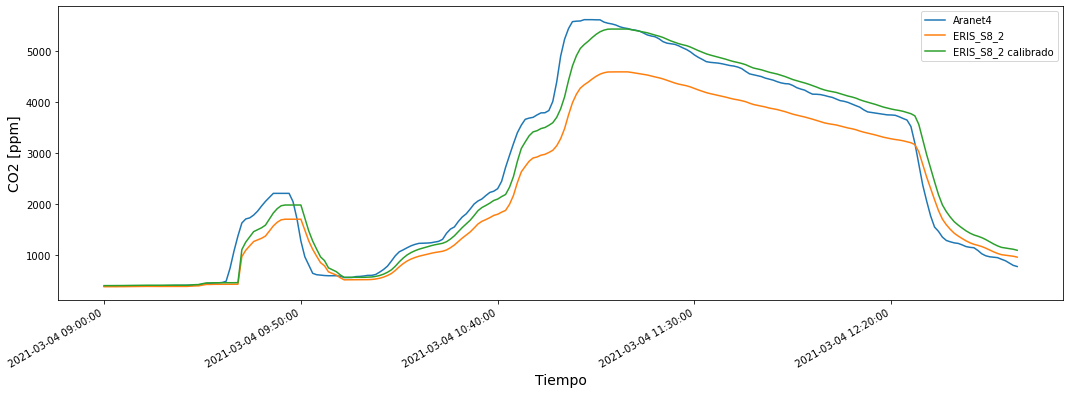

Coeficiente: 1.194  Intersección: -53.032


In [3]:
plt.figure(figsize = (18,6))
data.CO2_ar.plot(label = 'Aranet4')
data.CO2.plot(label = 'ERIS_S8_2')
data.CO2_cal_1.plot(label = 'ERIS_S8_2 calibrado')
plt.gcf().autofmt_xdate()
plt.ylabel('CO2 [ppm]', fontsize = 14)
plt.xlabel('Tiempo', fontsize = 14)
plt.legend()
plt.show()

print('Coeficiente:', round(paramt[0][0],3), ' Intersección:',round(paramt[0][1],3))

### Situación 1
Se aumentaron los niveles de $CO_2$, cerca a los 2000 ppm, para luego dejar tanto puerta como ventanas abiertas

#### Aranet4

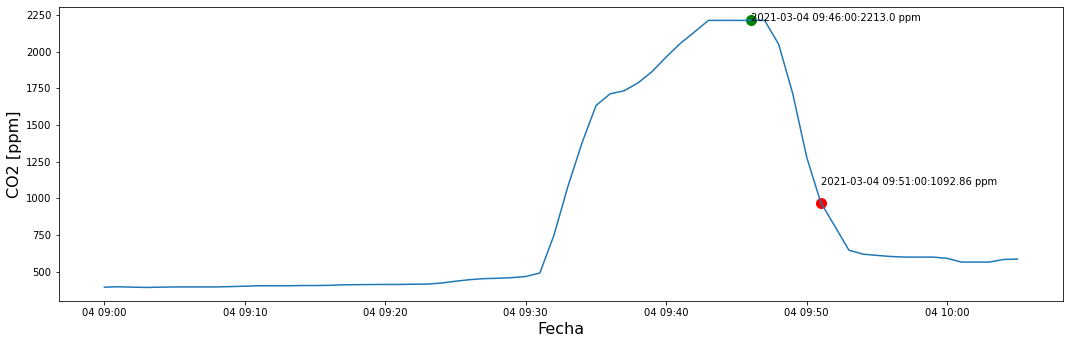

Calidad: Ideal , ACH: 11.931027280126402


In [4]:
ach.ACH(data,0,'2021-03-04 08:45:00', '2021-03-04 09:46:00' ,'2021-03-04 10:05:00')

##### ERIS_S8_2

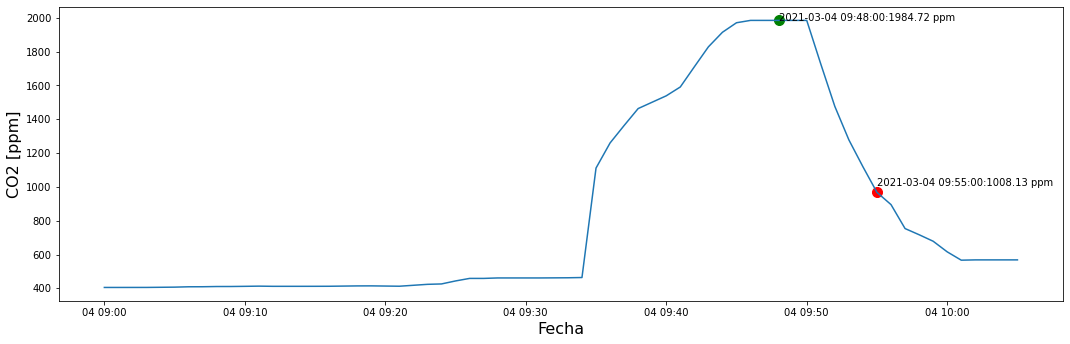

Calidad: Ideal , ACH: 8.526156229073854


In [5]:
ach.ACH(data,2,'2021-03-04 08:45:00', '2021-03-04 09:48:00' ,'2021-03-04 10:05:00')

### Situación 3
Se aumentaron los niveles de $CO_2$ alrededor de los 3000 ppm, para luego dejar 3/6 ventanas abiertas y la  puerta abierta.

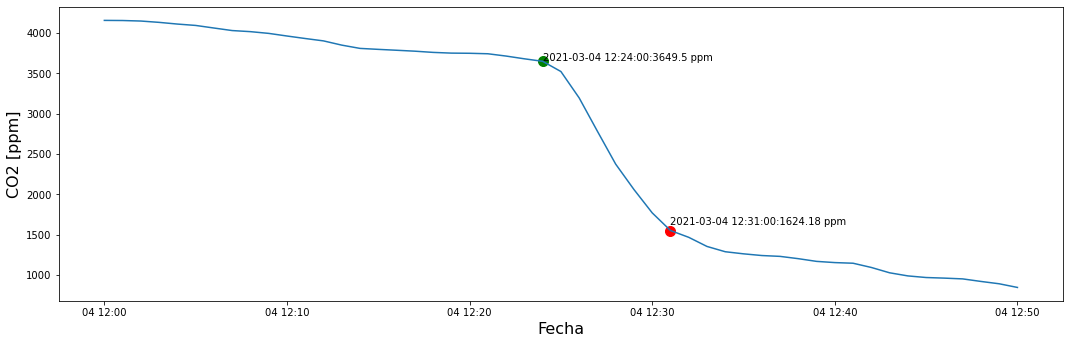

Calidad: Ideal , ACH: 8.523495691098432


In [6]:
ach.ACH(data,0,'2021-03-04 12:00:00', '2021-03-04 12:24:00' ,'2021-03-04 12:50:00')

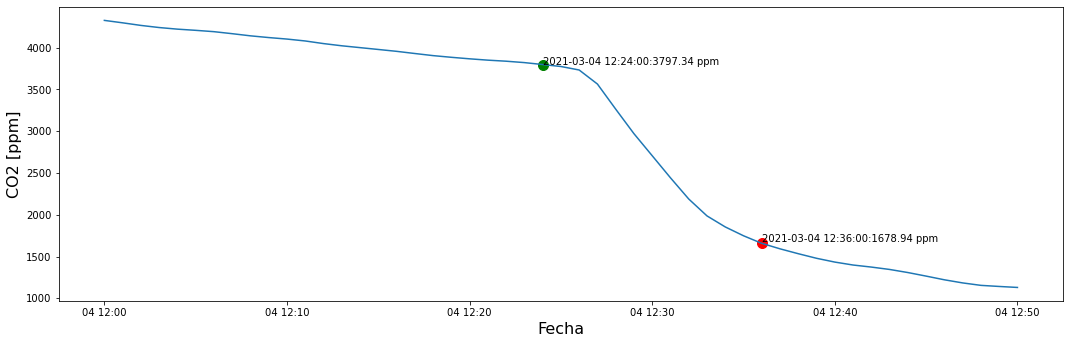

Calidad: Buena , ACH: 4.971761437161784


In [7]:
ach.ACH(data,2,'2021-03-04 12:00:00', '2021-03-04 12:24:00' ,'2021-03-04 12:50:00')

### Situación 2
Se aumentaron los niveles de $CO_2$ alrededor de 5000 ppm, y se mantuvieron vetanas cerradas al igual que la puerta. Para este caso es necesario asumir el que el decenso del $CO_2$ es lineal, para así determinar el valor de la tasa de recambio.

* *Inicio:* 2021-03-04 11:11:00  --> 5478.5
* *Fin:* 2021-03-04 12:19:00 --> 3751

In [8]:
import pandas as pd
import numpy as np
c_start = 5478.5
c_ambient = 400
c_end = c_ambient + 0.37 * (c_start - c_ambient)
t_start = pd.DatetimeIndex(['2021-03-04 11:11:00'] )
t_end = pd.DatetimeIndex(['2021-03-04 12:36:00'] )
ACH =  (-1 * np.log((c_end-c_ambient)/(c_start - c_ambient)))/((t_end -t_start).seconds / 3600)
print('ACH:',ACH[0])

ACH: 0.7018251341250825
